<a href="https://colab.research.google.com/github/franzeszperez/03MAIR-Algoritmos-de-optimizacion/blob/master/SEMINARIO/Francesc_Perez_Seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario
Nombre y Apellidos:  Francesc Pérez

Url: https://github.com/franzeszperez/03MAIR-Algoritmos-de-optimizacion/tree/master/SEMINARIO


---


Problema:
> 1. Elección de grupos de población homogéneos

Descripción del problema: 
El problema consiste en clasificar N animales en grupos para aplicar 3 tratamiento diferentes. Para cada tratamiento se deberá seleccionar 3 grupos de terneros que sean los más homogéneos posibles en peso, con el fin de que esta variable no influya en el tratamiento. Es decir, deberán conseguirse grupos que sean lo menos dispersos posibles entre sí, y lo más parecidos en media entre grupos.  





                                        

**(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?**

**¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.**




Respuesta:

Para el caso particular del problema de la elección de grupos homogéneos, el cálculo de posibilidades por cada ejecución del algoritmo es sencillo.

Se parten de un número N de terneros de entrada, a dividir entre 3 tratamientos y 3 grupos por cada tratamiento, por lo que a efectos prácticos hay que repartir los N terneros de entrada en 9 clústers. En este caso, se plantea una solucion que vaya construyendo los grupos iterativamente.

Para el primer ternero, hay disponibles N ciudades, puesto que todos los grupos están vacíos. Una vez añadido un ternero, quedan N-1 posibilidades. En la tercera iteración, habrá N-2 opciones. Por lo tanto, se está hablando de un cálculo de N*(N-1)*(N-2)*...*1*, es decir, de N!

En este caso, la restricción es que haya el mismo número de animales en cada uno de los clústers. Sin embargo, este hecho no afecta al número de posibilidades a elegir. 

**Modelo para el espacio de soluciones**

**(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Arguméntalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguméntalo)**


Respuesta:

Para la ejecución de este problema se tendrá un total de N animales. De esos N, se dividirán en machos y hembras, siendo N = N_machos + N_hembras, donde el número de terneros por cada sexo no tiene porqué ser el mismo.

Por tanto, el algoritmo recibirá un vector de tamaño N_machos o N_hembras, en función de la ejecución.

Para las soluciones del problema se debe buscar una estructura que permita agrupar cada uno de los tres tratamientos y cada uno de los tres grupos pertenecientes a cada tratamiento. Por ello, se ha optado por una matriz de 3 dimensiones, donde la tercera dimensión es cada uno de los tratamientos, cada columna es cada grupo dentro de un tratamiento, y los elementos de cada fila son cada uno de los animales que forman el grupo. Por lo tanto, esta matriz 3D tendrá un tamaño de 3 tratamientosx3 gruposxK elementos.

De la propia naturaleza de la matriz, cabe destacar que todos los grupos tendrán el mismo número de elementos, por lo que es probable que haya que descartar alguno de los animales. De hecho, de los N animales, sólo se seleccionarán K, que será igual al múltiplo de 9 (TratamientosxGrupos) más cercano al total de animales. Por ejemplo, en el caso de una ejecución con 100 animales, se van a usar 99 animales (11 por grupo y 33 por tratamiento), descartando 1 animal.  

**Según el modelo para el espacio de soluciones**

**(*)¿Cual es la función objetivo?**

**(*)¿Es un problema de maximización o minimización?**

Respuesta:

La especificación del problema pide que los grupos sean lo más homogéneos posibles en peso. Eso, traducido a lenguaje matemático, significa que los grupos deben tener la menor dispersión (varianza posible). Por lo tanto, se trata de un problema de minimización en que la función objetivo es la varianza de cada grupo.

In [0]:
import sys
# Función que busca el valor más cercano de un conjunto a un punto dado.
def punto_mas_cercano(punto, conjunto):
  animales = desempaquetar(conjunto)
  distancias = list(map(lambda x: abs(x - punto), animales))
  return np.argmin(distancias)
  
# Función que calcula la dispersión de cada clúster con el animal dado y lo clasifica en el grupo donde se consiga una menor 
# dispersión.
def calcula_dispersion(clusters, max_array, animal):
  added = False
  dispersion_min = sys.maxsize
  posicion_min = None
  outliers = []
  # Se recorre cada uno de los clústers
  for i in range(len(clusters)):
    # Si el clúster ha alcanzado su valor máximo, se pasa a la siguiente iteración
    if len(clusters[i])==max_array:
      continue
    elif len(clusters[i])==1:
      # Si el clúster tiene sólo un elemento, se usa la distancia euclídea para
      # clasificar al animal.
      if abs(clusters[i][0][1] - animal[1]) < dispersion_min:
        posicion_min = i
        dispersion_min = abs(clusters[i][0][1] - animal[1])
        added = True
    else:
      # Se calcula la varianza sin el animal.
      var_antigua = np.var([[clusters[i][w][1]] for w in range(len(clusters[i]))])
      # Se añade el animal al clúster y se calcula la varianza otra vez.
      candidato = clusters[i] + [animal]
      var_nueva = np.var(([[candidato[w][1]] for w in range(len(candidato))]))
      # Se computa el ratio de aumento de varianza
      aumento = var_nueva/var_antigua
      # Si la suma de la varianza antigua y el aumento es menor a la mínima dispersión, se almacena la posición del cluster.
      if var_antigua+aumento < dispersion_min:
        posicion_min = i
        dispersion_min = aumento
        added = True
  # Por último, se guarda en el clúster óptimo el nuevo animal.
  if not(posicion_min is None):
    clusters[posicion_min] = clusters[posicion_min] + [animal]
  else:
    outliers = animal
   
  return added, clusters, outliers  

Diseña un algoritmo para resolver el problema por fuerza bruta

Calcula la complejidad del algoritmo por fuerza bruta

**(*)Diseña un algoritmo que mejore la complejidad del algoritmo por fuerza bruta. Argumenta por qué crees que mejora el algoritmo por fuerza bruta.**

Respuesta

El algoritmo desarrollado se trata de un algoritmo voraz. En este caso, se va a elegir la solución óptima en cada iteración, consistente en añadir cada animal al grupo donde se obtenga una menor varianza. De esta forma, al finalizar todas las iteraciones, se habrá obtenido la solución óptima global.

La estrategia a seguir es la siguiente. Se van a hacer 9 segmentos (1 por grupo) equidistantes en el intervalo (media +- dos desviaciones). Se busca el dato más cercano al punto medio de cada uno de los segmentos, y se usa para inicializar cada uno de los clústers.

Una vez inicializado, se va a proceder a rellenar cada uno de los clústers. Para ello, se van a recorrer todos los animales disponibles, y se va a comparar la varianza de cada uno de los clústers, guardando el dato en el clúster en que se obtenga una menor varianza, y continuando con el siguiente animal. A parte de eso, se establece la limitación de que cada uno de los clústers tenga un número máximo permitido de elementos. 

Al finalizar el proceso de relleno de los clústers, se debe agrupar los grupos en 3 tratamientos. El criterio elegido ha sido el de elegir los grupos que tengan la media más cercana. Para ello, se ordenan los grupos en función de su media y se escogen los tres primeros para el tratamiento 1, los tres segundos para el 2 y los tres últimos para el 3.

In [0]:
def agrupar_animales(n_tratamientos, n_grupos, conjunto):
  animales = conjunto.copy()
  animales = desempaquetar(animales)
  # Cálculo del tamaño máximo del cluster
  max_array = len(animales)//(n_tratamientos*n_grupos)
  
  # Inicialización 
  clusters = [[] for x in range(n_tratamientos*n_grupos)]
  # Se definen los segmentos equidistantes donde empezará cada clúster,
  # y el origen por dónde empezar a buscar
  segmento = (np.mean(animales) + 2*np.std(animales, ddof=1) - (np.mean(animales) - 2*np.std(animales, ddof=1)))/(n_tratamientos*n_grupos)
  origen = np.mean(animales) - 2*np.std(animales, ddof=1) 
  # Bucle para recorrer los clústers e inicializarlos
  for i in range(n_tratamientos*n_grupos):
    punto = origen + segmento/2
    cercano = punto_mas_cercano(punto, conjunto)
    clusters[i] = [conjunto[cercano]]
    origen = origen + segmento
    del animales[cercano]
  
  outliers = []
  candidatos = conjunto.copy()
  contadora = 0
  tamano_candidatos = 0
  # While con el número máximo de pasadas que se hacen, por si hay nuevos datos a analizar.
  while contadora<10:
    descartados = []
    for j in range(len(candidatos)):
      # Se calcula la dispersión de cada uno de los clústers con el candidato y se devuelve el clúster relleno
      added, clusters, outliers = calcula_dispersion(clusters, max_array, candidatos[j]) 
      if added == False:
        # Si no se ha añadido a ningún clúster, se almacena
        descartados = descartados + [outliers]
    
    # Los candidatos ahora son los datos que no se han clasificado en ningún grupo
    candidatos = descartados
    # Si el tamaño de los candidatos es igual al tamaño anterior, se sale del bucle, porque no ha habido cambios
    if len(candidatos) == tamano_candidatos:
      break
    tamano_candidatos = len(candidatos)
    contadora = contadora + 1

  # Se ordena la lista en función de la media de cada clúster
  medias = list()
  for k in range(n_tratamientos*n_grupos):
    data = (k, np.mean([[clusters[k][w][1]] for w in range(len(clusters[k]))]))
    medias.append(data)
  medias = sorted(medias, key = lambda x:x[1])
  
  indices = [medias[w][0] for w in range(len(medias))]
  # Se clasifican los grupos en los distintos tratamientos
  tratamiento1 = clusters[indices[0]] + clusters[indices[1]] + clusters[indices[2]] 
  tratamiento2 = clusters[indices[3]] + clusters[indices[4]] + clusters[indices[5]]
  tratamiento3 = clusters[indices[6]] + clusters[indices[7]] + clusters[indices[8]]
    
  return tratamiento1, tratamiento2, tratamiento3

**(*)Calcula la complejidad del algoritmo.**

Respuesta

Dado que el número de animales se recorre sólo una vez, la complejidad del algoritmo es de O(n). Este número es distinto al número operaciones, que es mayor, ya que se recorre varias veces la longitud de los clústers (9).

**Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios**

Respuesta

Se va a generar un conjunto de datos que siga una distribución normal con los parámetros que se determinan en las especificaciones del problema. En este caso, se va a usar una media de 37 y una desviación de 2.1. Para el tamaño total del conjunto, se ha elegido usar 800 individuos.

In [0]:
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt

# Función para generar los datos, siguiendo una distribución normal con una media y una desviación dadas.
def generar_datos(media, desviacion, total):
  a = np.random.normal(media, desviacion, total)
  return [(i, a[i]) for i in range(total)]

# Función para desempaquetar los valores del peso de las tuplas
def desempaquetar(ganado):
  return list(map(itemgetter(1), ganado))

# Función para comprobar que los parámetros reales se acercan a los teóricos y para mostrar el histograma de los datos.
def comprobar_datos(media, desviacion, ganado):
  media_real = np.mean(ganado)
  desviacion_real = np.std(ganado, ddof=1)
  print("Media teórica: " + str(media) + ". Media real: " + str(media_real))
  print("Desviación teórica: " + str(desviacion) + ". Desviación real: " + str(desviacion_real))
  
  count, bins, ignored = plt.hist(ganado, 50, density=True)
  plt.plot(bins, 1/(desviacion * np.sqrt(2 * np.pi)) *np.exp( - (bins - media)**2 / (2 * desviacion**2) ), 
           linewidth=2, color='r')
  plt.show()

Media teórica: 37. Media real: 37.23050826896943
Desviación teórica: 2.1. Desviación real: 1.9746357349249033


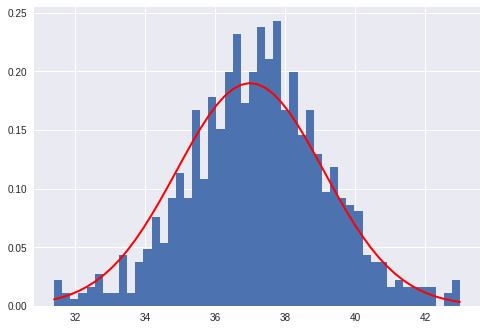

In [390]:
# Se determinan los parámetros que se van a usar para generar los datos.
# · Media = 37
# · Desviación = 2.1
# · Número de animales = 800
media = 37
desviacion = 2.1
N = 800
ganado = generar_datos(media, desviacion, N)

# Se computa la media y la desviación reales y se comparan con sus correspondientes valores teóricos.
# Para fines de comprensión, se muestra el histograma de los datos.
comprobar_datos(media, desviacion, desempaquetar(ganado))

Por otro lado, llegados a este punto hay que dividir el conjunto en machos y hembras, con el fin de realizar dos ejecuciones del algoritmo. La división se hará en función de un número aleatorio, que se ha decidido que sea de 0.45, para que haya más animales de un sexo que de otro, con el fin de testear el algoritmo.

In [0]:
# Función para dividir el conjunto entre machos y hembras.
def crear_machos_hembras(ganado):
  machos = []
  hembras = []
  for animal in ganado:
    if np.random.random() > 0.45:
      hembras.append(animal)
    else:
      machos.append(animal)
  return machos, hembras

[(1, 39.20352235519571), (5, 36.0607787645783), (6, 37.53616818211425), (7, 37.37341003186943), (8, 39.91386109083692), (15, 39.71423537498582), (17, 41.461336984169364), (20, 37.993288015556416), (23, 36.257486946573785), (26, 37.69341857172336), (31, 39.114372630806045), (32, 34.236838422504434), (33, 36.01490148248906), (35, 38.00424521696855), (37, 35.595179339904405), (38, 36.97789131202852), (44, 40.237505358087056), (48, 38.51938756885211), (53, 41.16697289543781), (54, 40.44799476806061), (58, 38.65763894964659), (60, 34.9037988865611), (62, 37.014034437995484), (64, 37.75808161746056), (65, 38.0904301799504), (66, 37.60659849453319), (67, 38.6458512303284), (70, 41.15478272857955), (71, 34.75601965334334), (73, 36.654557695892876), (75, 35.75813731259128), (79, 38.591125199931334), (81, 35.0917562267429), (82, 38.21735293230577), (84, 40.726136867575306), (85, 33.28901061140842), (86, 39.54772181850185), (87, 38.39418798940338), (88, 32.221986987508835), (91, 39.48912180018868

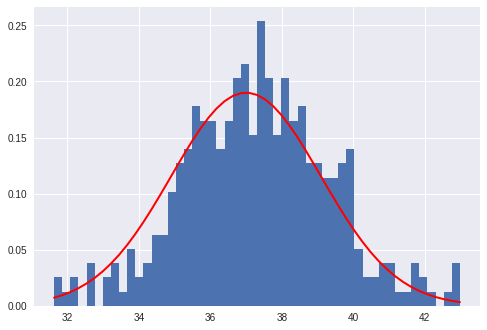

[(0, 35.76197491560068), (2, 34.95348621394038), (3, 35.856668443924626), (4, 37.59239810061038), (9, 36.30639973831058), (10, 38.82367610982299), (11, 37.15887190556042), (12, 42.228331740755486), (13, 37.92628171525048), (14, 38.31650916904207), (16, 40.31093142041365), (18, 37.08454496722721), (19, 38.27312392633826), (21, 37.17977625901265), (22, 36.30785280658672), (24, 36.389450774343686), (25, 37.11739697032764), (27, 38.242698145403146), (28, 36.48770758139326), (29, 39.92319220469677), (30, 38.254440058111435), (34, 38.70313294845107), (36, 37.309128827468875), (39, 34.71649109280174), (40, 35.45079116840457), (41, 37.07123465565391), (42, 35.218052264592), (43, 34.502776423494666), (45, 36.855126398741994), (46, 35.42295201131802), (47, 36.321448579678474), (49, 38.7570168390489), (50, 40.257892902519856), (51, 38.36448120042992), (52, 38.255876810726065), (55, 35.65714458618409), (56, 40.75244375601175), (57, 35.794044268359976), (59, 37.86703967444256), (61, 37.249663637524

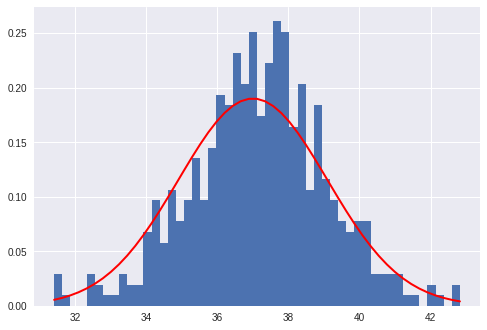

In [391]:
machos, hembras = crear_machos_hembras(ganado)
print(machos)
print("Conjunto de machos")
comprobar_datos(media, desviacion, desempaquetar(machos))

print(hembras)
print("Conjunto de hembras")
comprobar_datos(media, desviacion, desempaquetar(hembras))

**Aplica el algoritmo al juego de datos generado**

Respuesta

Se van a aplicar dos ejecuciones distintas del algoritmo, una con el conjunto de machos y otra con el conjunto de hembras. Simplemente se presentará el detalle de los animales pertenecientes a cada uno de los tratamientos.

In [392]:
n_trat = 3
n_grup = 3

print("Ejecución con el conjunto de machos")

T1, T2, T3 = agrupar_animales(n_trat, n_grup, machos)

print("Animales del tratamiento 1\n", T1)
print("Animales del tratamiento 2\n", T2)
print("Animales del tratamiento 3\n", T3)

Ejecución con el conjunto de machos
Animales del tratamiento 1
 [(127, 34.55154049841107), (32, 34.236838422504434), (127, 34.55154049841107), (230, 33.85740470462927), (242, 34.433813052338934), (243, 35.20697878379927), (255, 34.57220837906351), (274, 35.343501065863876), (280, 33.291107145479444), (282, 35.07540308135872), (283, 31.731772779550084), (291, 33.072548869795604), (293, 37.62628785691101), (296, 36.63420958972652), (299, 35.87290017266663), (300, 38.78800306239774), (304, 36.548158810666486), (305, 37.80170719327253), (306, 38.3972716488394), (309, 37.52698044026708), (310, 37.080926463748845), (313, 39.661093402851286), (314, 34.96180742515955), (316, 40.835155483521895), (319, 40.53979068280779), (322, 37.23223713181255), (326, 35.887701632616746), (328, 34.00332551597182), (329, 37.622711706075656), (332, 38.648860605217386), (333, 35.62163592714352), (336, 37.027436822698654), (345, 37.056365325337616), (346, 36.93430982877545), (347, 38.97358104353131), (348, 39.834

In [393]:
print("Ejecución con el conjunto de hembras")

T1, T2, T3 = agrupar_animales(n_trat, n_grup, hembras)

print("Animales del tratamiento 1\n", T1)
print("Animales del tratamiento 2\n", T2)
print("Animales del tratamiento 3\n", T3)

Ejecución con el conjunto de hembras
Animales del tratamiento 1
 [(253, 33.73934669718403), (42, 35.218052264592), (43, 34.502776423494666), (63, 31.83115247075297), (80, 32.583877397204), (83, 34.33497519083549), (112, 34.21735109317252), (121, 32.34453467695358), (126, 32.75591106280265), (132, 33.4306930671811), (136, 33.465397054308326), (137, 34.92210888686811), (140, 31.40692287257064), (146, 34.065250205708686), (162, 34.8928472487321), (171, 35.893234077008195), (172, 32.497412373030194), (183, 32.86196705935748), (198, 34.45948653842912), (200, 33.9306070802578), (204, 35.83457019406361), (207, 36.155455625017915), (209, 36.2647619670588), (213, 35.92271008816599), (219, 36.73016287012809), (221, 38.17041834332794), (227, 36.57308153621938), (228, 34.36637622275), (229, 37.400112053093885), (231, 39.708909750431175), (232, 37.659843638638044), (233, 36.199307333873634), (235, 39.34801649805454), (236, 36.74293865437329), (238, 39.52357325481617), (240, 38.272174879621474), (24

**Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo**

Respuesta

Para la realización de este programa ha sido necesario consultar cierta bibliografía. Ha habido dos artículos que han sido de mucha utilidad:
 
1.   [MÉTODOS DE ANÁLISIS MULTIVARIANTE: ANÁLISIS CLÚSTER](http://wpd.ugr.es/~bioestad/guia-spss/practica-8/#20)
2.   [TWO METHODS FOR SPLITTING DATA INTO HOMOGENEOUS GROUPS](https://www.ssb.no/a/histstat/ano/ano_io70_07.pdf)



**Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño**

Respuesta

En primero lugar habría que modificar el algoritmo para hacerlo genérico, ya que ahora mismo está forzado a que trabaje con tres tratamientos de tres grupos cada uno.

Por otro lado, convendría investigar otros métodos para el cálculo de la dispersión, pues la varianza no es una medida robusta frente a los outliers, además de evalúar y comparar otras formas de inicializar cada uno de los clústers.